In [4]:
import pandas as pd
import pandas_ta as ta
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")


In [5]:
ticker = "AAPL"
start_date = "2023-01-01"
end_date = "2023-12-31"

df = yf.download(ticker, start=start_date, end=end_date)
df.dropna(inplace=True)
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.470612,129.226052,122.582119,128.613985,112117500
2023-01-04,124.744125,127.014716,123.480495,125.267347,89113600
2023-01-05,123.421265,126.136098,123.164595,125.504283,80962700
2023-01-06,127.962425,128.623856,123.292916,124.398597,87754700
2023-01-09,128.485641,131.703962,128.228972,128.801557,70790800


In [7]:
# Moving Average
df[("SMA_20", "")] = ta.sma(df[("Close", "AAPL")], length=20)

# Relative Strength Index
df[("RSI_14", "")] = ta.rsi(df[("Close", "AAPL")], length=14)

# MACD
macd = ta.macd(df[("Close", "AAPL")])
df[("MACD", "")] = macd["MACD_12_26_9"]
df[("Signal", "")] = macd["MACDs_12_26_9"]
df[("Histogram", "")] = macd["MACDh_12_26_9"]


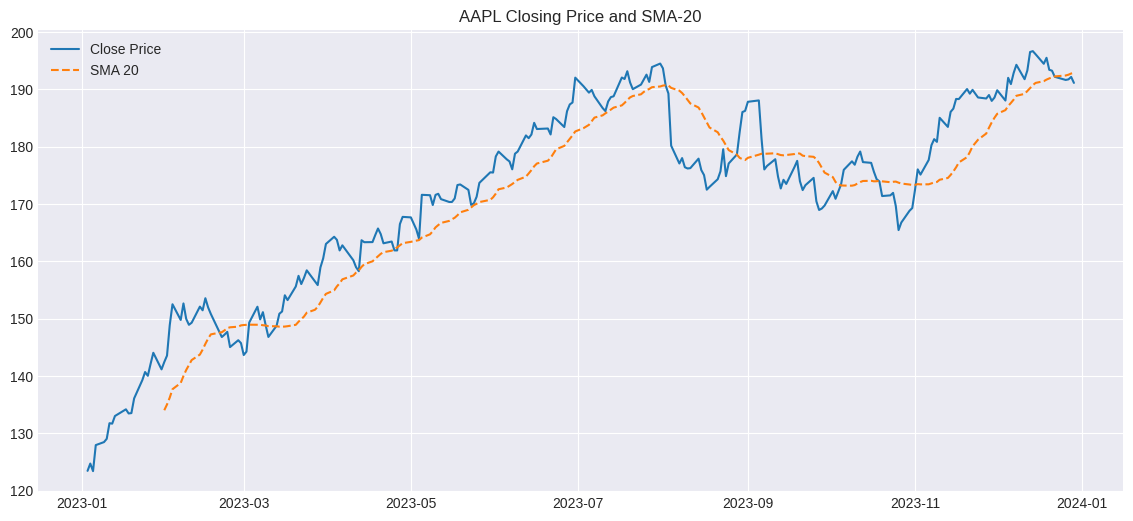

In [8]:
plt.figure(figsize=(14,6))
plt.plot(df["Close"], label="Close Price")
plt.plot(df["SMA_20"], label="SMA 20", linestyle="--")
plt.title("AAPL Closing Price and SMA-20")
plt.legend()
plt.show()


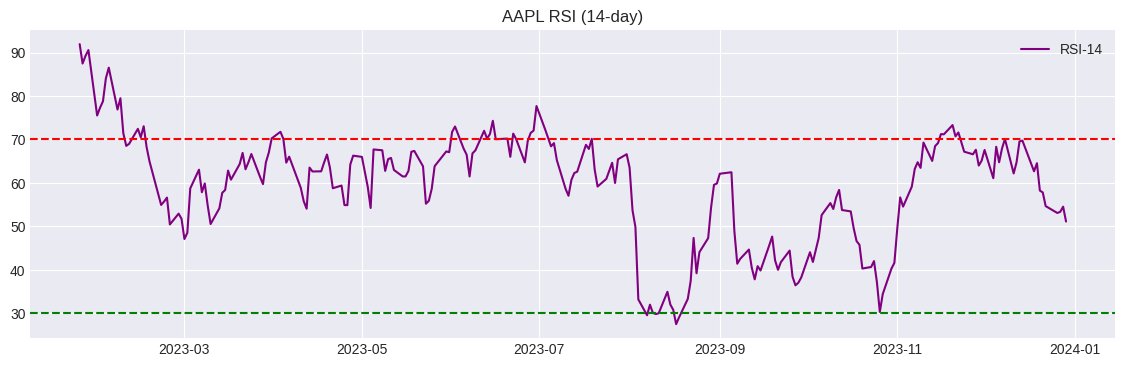

In [9]:
plt.figure(figsize=(14,4))
plt.plot(df["RSI_14"], label="RSI-14", color="purple")
plt.axhline(70, color="red", linestyle="--")
plt.axhline(30, color="green", linestyle="--")
plt.title("AAPL RSI (14-day)")
plt.legend()
plt.show()
